In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Generate dataset with 2000 instances, 3 features, and 1 output
X, y = make_regression(n_samples=2000, n_features=3, n_targets=1, noise=0.1, random_state=42)

# Split the data: 1500 for training, 200 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1500, test_size=500, random_state=42)


In [3]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # unsqueeze for single output dimension
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create TensorDataset and DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the neural network architecture
class RegressionNN(nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(3, 64),  # Input layer
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)   # Output layer
        )

    def forward(self, x):
        return self.layers(x)

# Instantiate the model, define loss function and optimizer
model = RegressionNN()
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [5]:
# Training parameters
epochs = 100
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()           # Clear gradients
        outputs = model(inputs)         # Forward pass
        loss = criterion(outputs, targets)  # Calculate loss
        loss.backward()                 # Backpropagation
        optimizer.step()                # Update weights
        running_loss += loss.item() * inputs.size(0)  # Accumulate loss
    
    # Print average loss for the epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")


Epoch [1/100], Loss: 1879.2135
Epoch [2/100], Loss: 73.6271
Epoch [3/100], Loss: 12.0027
Epoch [4/100], Loss: 4.1003
Epoch [5/100], Loss: 2.5755
Epoch [6/100], Loss: 1.8896
Epoch [7/100], Loss: 1.4738
Epoch [8/100], Loss: 2.1034
Epoch [9/100], Loss: 2.4891
Epoch [10/100], Loss: 1.1465
Epoch [11/100], Loss: 0.8561
Epoch [12/100], Loss: 0.8065
Epoch [13/100], Loss: 0.7256
Epoch [14/100], Loss: 0.7982
Epoch [15/100], Loss: 0.7486
Epoch [16/100], Loss: 0.5917
Epoch [17/100], Loss: 0.6768
Epoch [18/100], Loss: 0.7937
Epoch [19/100], Loss: 0.7854
Epoch [20/100], Loss: 0.8019
Epoch [21/100], Loss: 0.6707
Epoch [22/100], Loss: 1.0937
Epoch [23/100], Loss: 0.6671
Epoch [24/100], Loss: 0.5893
Epoch [25/100], Loss: 0.7173
Epoch [26/100], Loss: 1.3845
Epoch [27/100], Loss: 0.6740
Epoch [28/100], Loss: 0.5059
Epoch [29/100], Loss: 0.6058
Epoch [30/100], Loss: 0.5401
Epoch [31/100], Loss: 0.7472
Epoch [32/100], Loss: 0.7672
Epoch [33/100], Loss: 2.1316
Epoch [34/100], Loss: 0.3911
Epoch [35/100], Lo

In [6]:
# Switch to evaluation mode
model.eval()
predictions = []
actuals = []

with torch.no_grad():  # No need to compute gradients
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.extend(outputs.squeeze().tolist())  # Append predictions
        actuals.extend(targets.squeeze().tolist())      # Append actual values

# Convert predictions and actuals to lists and calculate metrics
mse = mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 0.6372
Mean Absolute Error: 0.5979
R-squared: 0.9997


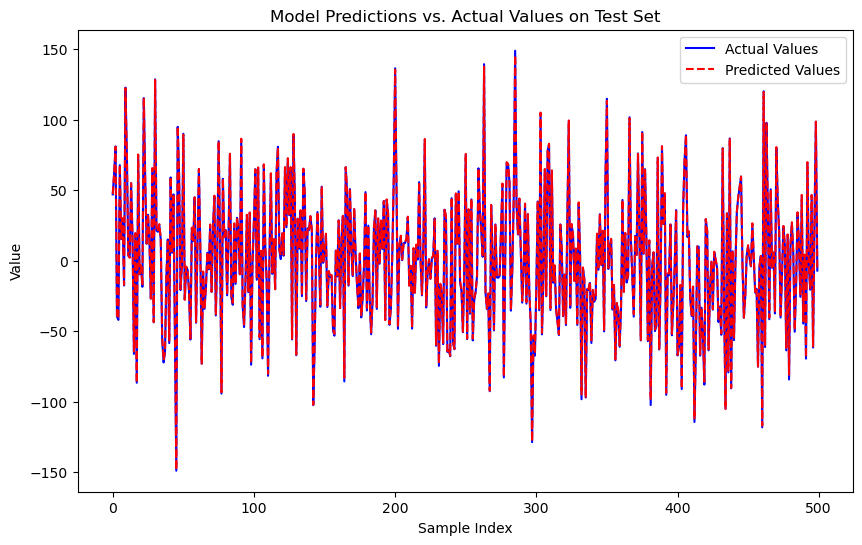

In [7]:
# Convert predictions and actuals to NumPy arrays for plotting
predictions = np.array(predictions)
actuals = np.array(actuals)

# Plot the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(actuals, label='Actual Values', linestyle='-', color='b', markersize=4)
plt.plot(predictions, label='Predicted Values',  linestyle='--', color='r', markersize=4)
plt.title('Model Predictions vs. Actual Values on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [8]:
model

RegressionNN(
  (layers): Sequential(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=32, bias=True)
    (11): ReLU()
    (12): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [9]:
# Define the file path
file_path = 'data/regression_test_7.txt'

# Combine features and output for each test instance
test_data = np.hstack((X_test, y_test.reshape(-1, 1)))

# Save to file without brackets
with open(file_path, 'w') as f:
    for row in test_data:
        # Write row as a comma-separated line without brackets
        f.write(", ".join(map(str, row)) + "\n")

print(f"Test data saved to {file_path}")

Test data saved to data/regression_test_7.txt


In [10]:
# Define the full path for saving the model
model_path = 'model/pth/regression_model_7.pth'

# Save the model parameters
torch.save(model.state_dict(), model_path)

print(f"Model saved to {model_path}")

Model saved to model/pth/regression_model_7.pth


In [11]:
# Define the path for the ONNX file
onnx_path = 'model/onnx/regression_model_7.onnx'

# Specify a dummy input to trace the model's structure
dummy_input = torch.randn(1, 3)  # Adjust the shape (1, 3) based on your model's input requirements

# Export the model to ONNX format
torch.onnx.export(
    model,                        # Model to be exported
    dummy_input,                  # Dummy input tensor to define the input size
    onnx_path,                    # Path to save the ONNX model
    export_params=True,           # Store the trained parameter weights inside the model file
    opset_version=11,             # ONNX version to export to
    input_names=['input'],        # Name of the input layer
    output_names=['output'],      # Name of the output layer
    dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}  # Dynamic batching
)

print(f"Model saved in ONNX format to {onnx_path}")

Model saved in ONNX format to model/onnx/regression_model_7.onnx
